In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn.preprocessing import OneHotEncoder
import pickle
from joblib import dump
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import svm
from typing import List
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
df = pd.read_csv('/content/drive/MyDrive/VA Project/weatherAUS.csv')

In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
df.shape

(145460, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

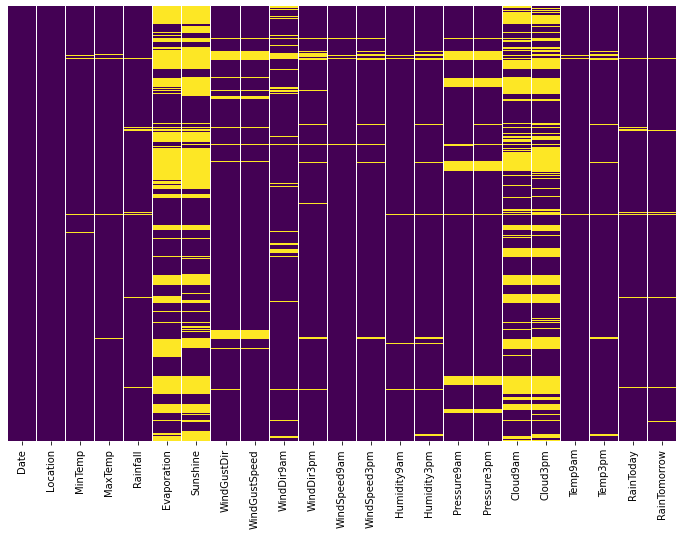

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
df.isnull().sum().sort_values(ascending=False)

Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
RainToday         3261
Rainfall          3261
WindSpeed3pm      3062
Humidity9am       2654
WindSpeed9am      1767
Temp9am           1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64

In [11]:
df.isnull().sum().sort_values(ascending=False) * 100 / len(df)

Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
RainToday         2.241853
Rainfall          2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
WindSpeed9am      1.214767
Temp9am           1.214767
MinTemp           1.020899
MaxTemp           0.866905
Location          0.000000
Date              0.000000
dtype: float64

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


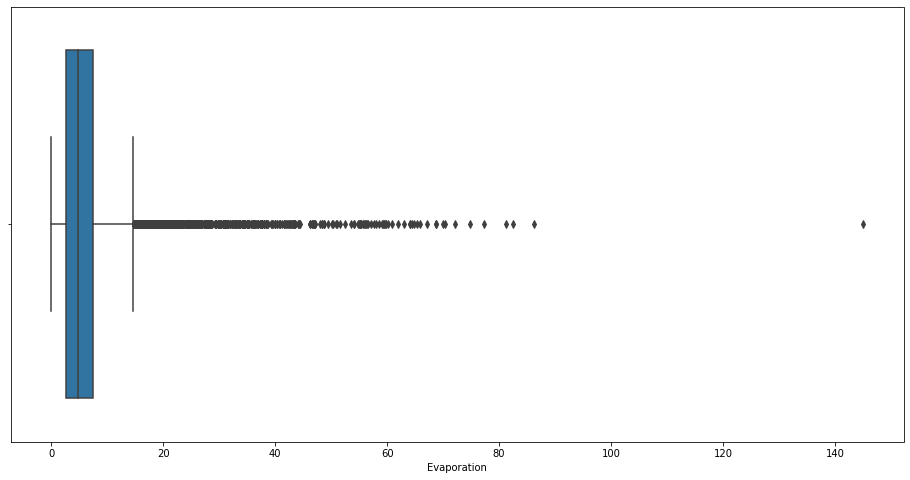

In [13]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(x='Evaporation', data=df)

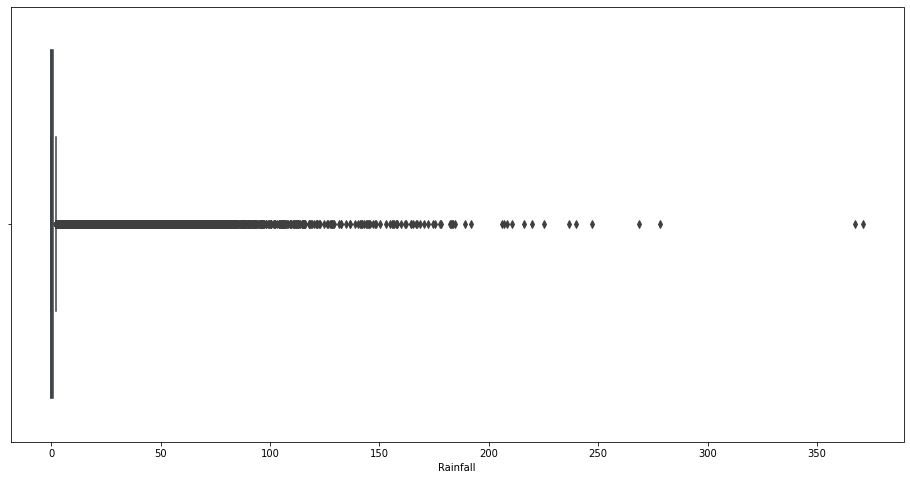

In [14]:
plt.figure(figsize=(16,8))
sns.boxplot(x='Rainfall', data=df)

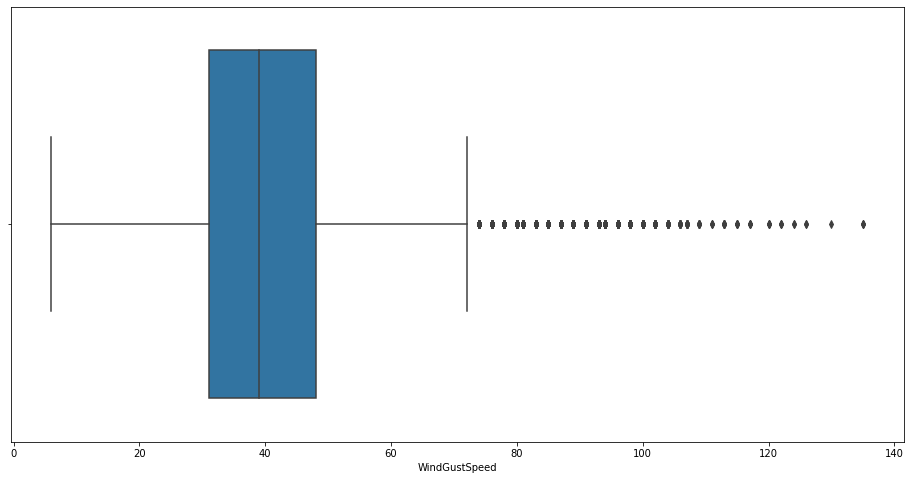

In [15]:
plt.figure(figsize=(16,8))
sns.boxplot(x='WindGustSpeed', data=df)

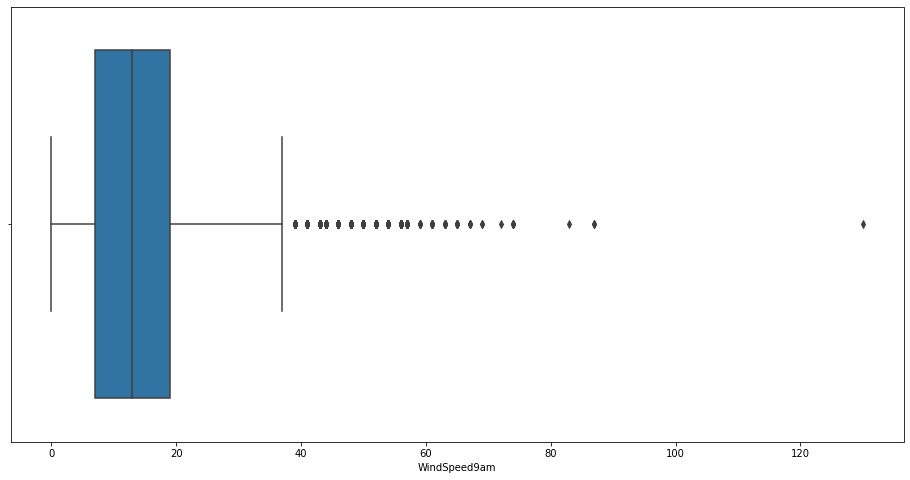

In [16]:
plt.figure(figsize=(16,8))
sns.boxplot(x='WindSpeed9am', data=df)

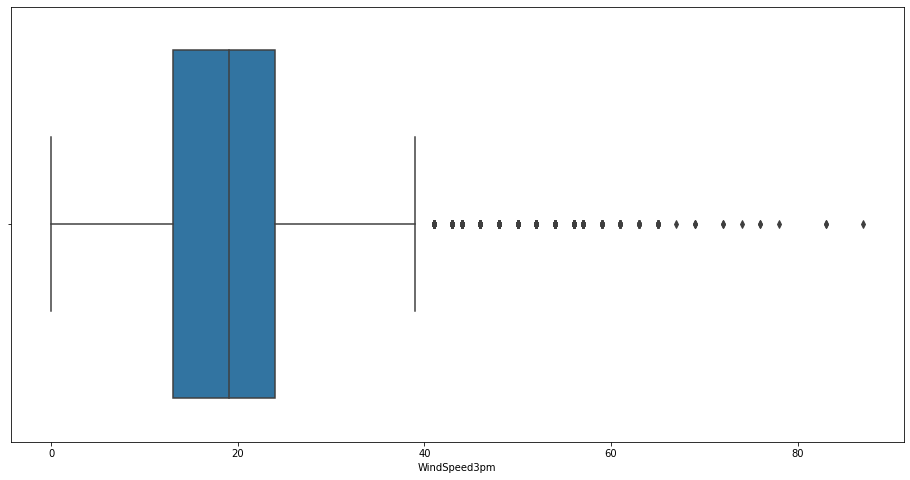

In [17]:
plt.figure(figsize=(16,8))
sns.boxplot(x='WindSpeed3pm', data=df)

In [18]:
pd.to_datetime(df['Date']).sort_values()

45587    2007-11-01
45588    2007-11-02
45589    2007-11-03
45590    2007-11-04
45591    2007-11-05
            ...    
64190    2017-06-25
67199    2017-06-25
70392    2017-06-25
123830   2017-06-25
145459   2017-06-25
Name: Date, Length: 145460, dtype: datetime64[ns]

In [19]:
df.duplicated().value_counts()

False    145460
dtype: int64

In [20]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df.drop('Date', axis=1, inplace=True)

In [22]:
def get_numeric_columns(df: pd.DataFrame) -> List[str]:
    #print(df.select_dtypes(include='number'))
    return list(df.select_dtypes(include='number').columns.values)
def get_text_categorical_columns(df: pd.DataFrame) -> List[str]:
    #print(df.select_dtypes(include='object'))
    return list(df.select_dtypes(include='object').columns.values)
def fix_outliers(df: pd.DataFrame, column: str) -> pd.DataFrame:
    numeric_cols = get_numeric_columns(df)
    if(column in numeric_cols):
        temp_df = df.copy()
        #Using mean - standard deviation rule to find the lowest and highest limit
        highest_limit = temp_df[column].mean() + 3*temp_df[column].std()
        lowest_limit = temp_df[column].mean() - 3*temp_df[column].std()
        #Replace values less than lower limit to lower limit and values higher than upper limit to upper limit value
        temp_df[column] = np.where(temp_df[column] > highest_limit,highest_limit,np.where(temp_df[column] < lowest_limit,lowest_limit,temp_df[column]))
        return temp_df
    return df

In [23]:
numeric_cols = get_numeric_columns(df)
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year']


In [24]:
for col in numeric_cols:
  df = fix_outliers(df, col)

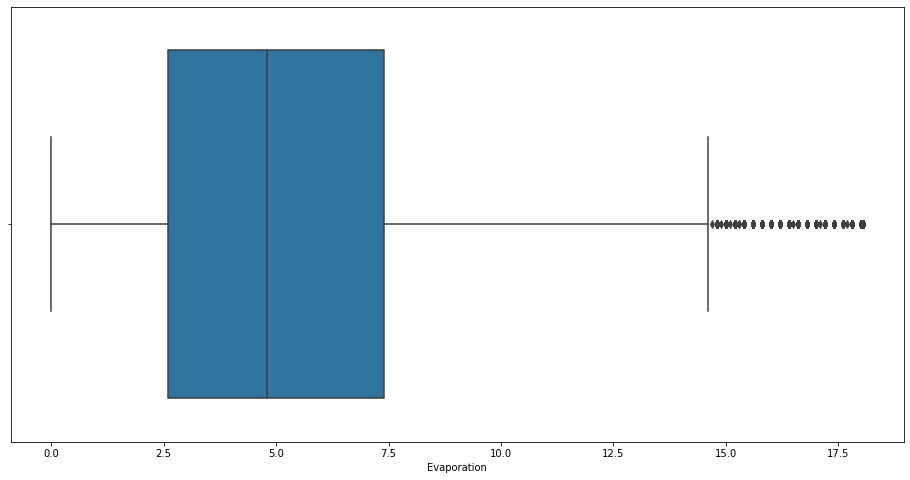

In [25]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(x='Evaporation', data=df)

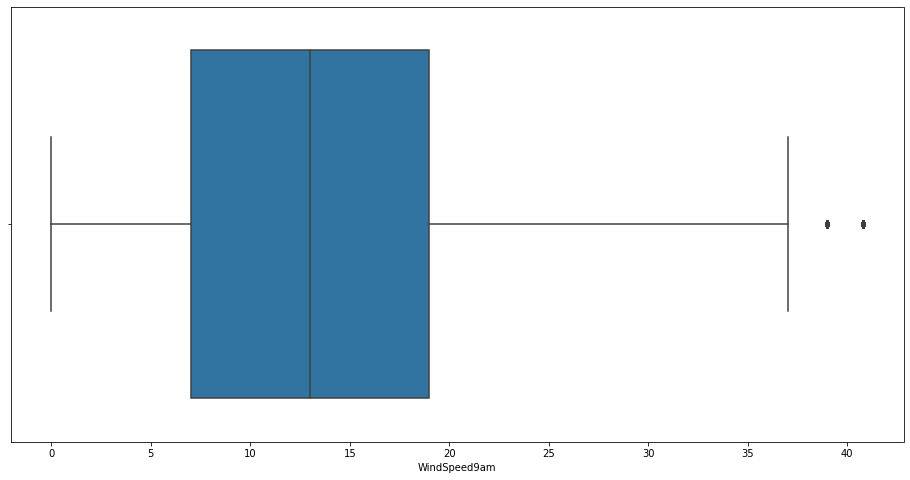

In [26]:
plt.figure(figsize=(16,8))
sns.boxplot(x='WindSpeed9am', data=df)

In [29]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008.0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008.0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008.0
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008.0
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008.0


In [30]:
df = df.dropna()

In [31]:
df.isnull().sum().sort_values(ascending=False) * 100 / len(df)

year             0.0
WindSpeed9am     0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed3pm     0.0
RainTomorrow     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
Location         0.0
dtype: float64

In [32]:
df.shape

(56420, 23)

In [33]:
df.to_csv('/content/drive/MyDrive/VA Project/weatherAUS-processed.csv', index=False)

In [35]:
le = LabelEncoder()
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'].values)

In [36]:
file_name = '/content/drive/MyDrive/VA Project/labelEncoder.pkl'
pickle.dump(le, open(file_name, 'wb'))

In [37]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0,2009.0
6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,0,2009.0
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0,2009.0
6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0,2009.0
6054,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,0,2009.0


In [38]:
categorical_cols = get_text_categorical_columns(df)
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [39]:
np.sort(df.Location.unique())

array(['AliceSprings', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
       'CoffsHarbour', 'Darwin', 'Hobart', 'Melbourne',
       'MelbourneAirport', 'Mildura', 'Moree', 'MountGambier',
       'NorfolkIsland', 'Nuriootpa', 'Perth', 'PerthAirport', 'Portland',
       'Sale', 'Sydney', 'SydneyAirport', 'Townsville', 'WaggaWagga',
       'Watsonia', 'Williamtown', 'Woomera'], dtype=object)

In [40]:
np.sort(df.WindGustDir.unique())

array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object)

In [45]:
df = pd.get_dummies(df, columns=categorical_cols)

In [46]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,year,Location_AliceSprings,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Darwin,Location_Hobart,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_NorfolkIsland,Location_Nuriootpa,Location_Perth,Location_PerthAirport,Location_Portland,Location_Sale,Location_Sydney,Location_SydneyAirport,Location_Townsville,...,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,2009.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,2009.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,2009.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,2009.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,2009.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [47]:
y = df['RainTomorrow']
X = df.drop(['RainTomorrow', 'year'], axis=1)

In [49]:
scaler = MinMaxScaler()

In [50]:
scaler.fit(X)

MinMaxScaler()

In [51]:
X = scaler.transform(X)

In [52]:
X

array([[0.64584695, 0.7683092 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.65897392, 0.612671  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.68522787, 0.82759994, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.71935799, 0.70901846, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.68785326, 0.68431398, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.70623102, 0.68184354, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
file_name = '/content/drive/MyDrive/VA Project/scaler.pkl'
pickle.dump(scaler, open(file_name, 'wb'))

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
rf_model = RandomForestClassifier(n_estimators=2, max_depth=3)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Calculating Scores
rf_confusion_matrix = confusion_matrix(y_test, y_pred)
rf_classification_report = classification_report(y_test, y_pred)

In [ ]:
print(rf_classification_report)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      8799
           1       0.66      0.29      0.40      2485

    accuracy                           0.81     11284
   macro avg       0.74      0.62      0.65     11284
weighted avg       0.79      0.81      0.78     11284



In [ ]:
print(rf_confusion_matrix)

[[8434  365]
 [1767  718]]


In [56]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

In [58]:
# Predicting the Test set results
y_pred_xgb = xgb.predict(X_test)

In [69]:
y_pred_xgb

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
# Making the Confusion Matrix
print(confusion_matrix(y_test, y_pred_xgb))

[[8380  419]
 [1208 1277]]


In [71]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8799
           1       0.75      0.51      0.61      2485

    accuracy                           0.86     11284
   macro avg       0.81      0.73      0.76     11284
weighted avg       0.85      0.86      0.85     11284



In [72]:
print(accuracy_score(y_test,y_pred_xgb))

0.8558135412974123


In [79]:
result = pd.DataFrame()

In [80]:
result['true_value'] = le.inverse_transform(y_test)

In [82]:
result['predicted_value'] = le.inverse_transform(y_pred_xgb)

In [83]:
result.head()

,true_value,predicted_value
0,Yes,No
1,No,No
2,No,No
3,No,No
4,No,No


In [84]:
df.to_csv('/content/drive/MyDrive/VA Project/result.csv', index=False)

In [ ]:
file_name = '/content/drive/MyDrive/VA Project/xgboostModel.pkl'

In [ ]:
pickle.dump(xgb, open(file_name, 'wb'))

In [93]:
file_name = '/content/drive/MyDrive/VA Project/finalModel.joblib'

In [95]:
dump(xgb, file_name)

['/content/drive/MyDrive/VA Project/finalModel.joblib']

In [96]:
pickleModel = pickle.load(open('/content/drive/MyDrive/VA Project/xgboostModel.pkl', 'rb'))

In [ ]:
X_train.shape

(45136, 92)

In [ ]:
model = Sequential()
model.add(Dense(units=92,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=46,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=23,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          batch_size=256,
          validation_data=(X_test, y_test),
          callbacks=[early_stop]
          )

Epoch 1/100
177/177 [==============================] - 2s 7ms/step - loss: 0.4676 - accuracy: 0.7763 - val_loss: 0.3758 - val_accuracy: 0.8407
Epoch 2/100
177/177 [==============================] - 1s 6ms/step - loss: 0.3938 - accuracy: 0.8229 - val_loss: 0.3513 - val_accuracy: 0.8399
Epoch 3/100
177/177 [==============================] - 1s 6ms/step - loss: 0.3709 - accuracy: 0.8394 - val_loss: 0.3400 - val_accuracy: 0.8532
Epoch 4/100
177/177 [==============================] - 1s 6ms/step - loss: 0.3631 - accuracy: 0.8456 - val_loss: 0.3330 - val_accuracy: 0.8564
Epoch 5/100
177/177 [==============================] - 1s 6ms/step - loss: 0.3537 - accuracy: 0.8522 - val_loss: 0.3288 - val_accuracy: 0.8579
Epoch 6/100
177/177 [==============================] - 1s 6ms/step - loss: 0.3470 - accuracy: 0.8507 - val_loss: 0.3257 - val_accuracy: 0.8580
Epoch 7/100
177/177 [==============================] - 1s 6ms/step - loss: 0.3422 - accuracy: 0.8534 - val_loss: 0.3259 - val_accuracy: 0.8566

In [ ]:

# model.save('Project.h5')

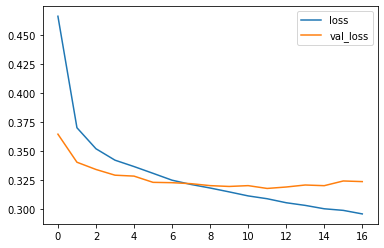

In [ ]:
loss = pd.DataFrame(model.history.history)
loss[['loss','val_loss']].plot()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = (y_pred > 0.5).astype(np.int)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8799
           1       0.76      0.53      0.62      2485

    accuracy                           0.86     11284
   macro avg       0.82      0.74      0.77     11284
weighted avg       0.85      0.86      0.85     11284



In [ ]:
# Making the Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[8376  423]
 [1171 1314]]


In [ ]:
print(accuracy_score(y_test,y_pred))

0.858738036157391
